## **IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import module.preprocessing as preprocessing
import module.outliers as outliers
import module.feature_engineering as feature_engineering
import module.classification_model as classification_model
import module.visualization as visualization

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import confusion_matrix

## **DATASET READING**

In [2]:
df = pd.read_csv("data/data.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## **DATA PREPROCESSING**

Con **rename_columns()**, rinominiamo le colonne del dataset in Italiano.

In [3]:
df_renamed = preprocessing.rename_columns(df)

## **OUTLIERS**

Con **remove_outliers()**, andiamo a rimuovere gli outliers dalle Features, utilizzando la tecnica della **deviazione standard**.

In [4]:
# Inizializzo il dataset che conterrà i dati senza outliers
df_clean = df_renamed.copy()

In [5]:
# Isolo le Features
features = df_clean.drop(['Bancarotta'], axis = 1)

In [6]:
# Procedo alla rimozione degli outliers dalle Features
df_clean = outliers.remove_outliers(df_renamed, df_clean, features)

Outliers individuati: 4534
Osservazioni rimosse: 1910


## **UNDERSAMPLING**

Visualizziamo la distribuzione delle classi del Target **senza outliers**:
- 0: 4790
- 1: 119

In [7]:
df_clean['Bancarotta'].value_counts()

Bancarotta
0    4790
1     119
Name: count, dtype: int64

Con **undersampling()**, effettuiamo un'operazione di **undersampling** per **bilanciare le classi del Target**.

Dal risultato, notiamo che ora le classi del Target sono **bilanciate** (**119**).

In [8]:
df_balanced, index_class_1, same_size_index_class_0, index_class_0 = preprocessing.undersampling(df_clean)

Numero di osservazioni totali: Bancarotta
1    119
0    119
Name: count, dtype: int64


## **TRAIN-TEST SPLIT**

Dividiamo il dataset in **Train** e **Test set** per l'allenamento del modello.

In [9]:
y = df_balanced['Bancarotta'] # Isolo il Target
x = df_balanced.drop(['Bancarotta'], axis = 1) # Isolo le Features

# Procedo allo split tra Train e Test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## **OVERSAMPLING**

Con **oversampling()**, effettuiamo un'operazione di **oversampling** sulla **classe minoritaria del Target** (1), creando l'**80% di nuove osservazioni** tramite **SMOTE**. In questo modo, avendo più dati a disposizione, possiamo garantire la **robustezza del modello**.

In [11]:
X_train_smote, y_train_smote = preprocessing.oversampling(df_clean, X_train, X_test, y_train)

(342, 95)
Bancarotta
1    171
0    171
Name: count, dtype: int64


# **PRINCIPAL COMPONENT ANALYSIS**

### **Feature Engineering**

Poiché la **PCA** è **sensibile alla dispersione dei dati** e **alla scala di misura diversa** delle Features, effettueremo un'operazione di **Feature Engineering** con la **standardizzazione**.

In [12]:
# Standardizzazione delle Features
X_train_standard, X_test_standard = feature_engineering.standard_scaler(X_train_smote, X_test)

### **Esecuzione della PCA**

Con **pca_tranformation()**, andiamo a seguire la **PCA**.

In [13]:
pca, pca_X_train, pca_X_test = classification_model.pca_transformation(X_train_standard, X_test_standard)

Numero di componenti principali selezionati: 15
Varianza spiegata da ciascuna componente: [0.26853575 0.08935369 0.08207463 0.04450439 0.04291069 0.03648141
 0.03272553 0.02939207 0.02610852 0.02259503 0.02006953 0.01833584
 0.01782079 0.01573385 0.01450183]
Varianza totale spiegata: 0.76


Con **print_pca_features()**, visualizziamo quali sono le Features che compongono ciascuna Componente Principale.

In [14]:
classification_model.print_pca_features(pca, X_train_standard)


Componente Principale 1:
EPS persistente nelle ultime quattro stagioni: 0.1802
Profitto netto prima delle imposte / Capitale sociale versato: 0.1772
Profitto netto per azione prima delle tasse (Yuan ¥): 0.1766
Redditività sull'Attivo Totale (NITA): 0.1766
ROA(B) al lordo di interessi e ammortamenti dopo le imposte: 0.1754
ROA(A) prima degli interessi e dopo le tasse: 0.1752
ROA(C) prima degli interessi e della svalutazione: 0.1745
Utile netto/patrimonio netto: 0.1730
Profitto Operativo per Azione (Yuan ¥): 0.1577
Profitto operativo su capitale versato: 0.1571
Rapporto debito %: -0.1558
Patrimonio netto/Attività: 0.1558
Riserve utili su attivo totale: 0.1552
Indebitamento da prestiti: -0.1546
Valore Netto per Azione (C): 0.1541
Valore Netto per Azione (A): 0.1540
Valore Netto per Azione (B): 0.1540
Reddito totale/Spese totali: 0.1501
Responsabilità verso il patrimonio netto: -0.1489
Debito totale/ Patrimonio netto totale: -0.1489
Passività correnti su patrimonio netto: -0.1376
Passivit

Con **plot_pca_variance()**, visualizziamo graficamente la **varianza spiegata dalle componenti principali**. 

In particolare, **calcoliamo la varianza cumulativa** e **identifichiamo il punto in cui questa supera il 75%**. Dopodiché, traccimao un **istogramma per la varianza individuale** e una **curva per la varianza cumulativa**. Infine, indichiamo con un **punto rosso** il raggiungimento del **75% di varianza cumulativa.**

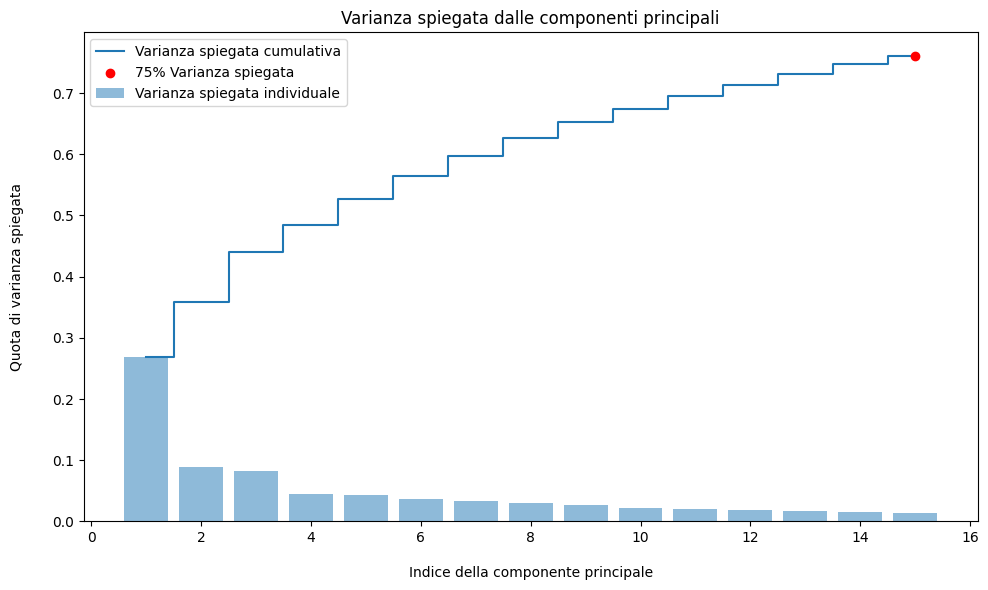

In [15]:
visualization.plot_pca_variance(pca)

## **REGRESSIONE LOGISTICA**

In [16]:
# Isolo i le Features di Train e di Test per la Regressione Logistica
log_reg_X_train = pca_X_train.copy()
log_reg_X_test = pca_X_test.copy()

In [17]:
# Inizializzo il modello di Regressione Logistica
log_reg = LogisticRegression(random_state=42)

In [18]:
# Calcolo l'accuracy del modello sui Dati di Test e salvo le previsioni
log_reg_y_pred, log_reg_y_proba, pca_log_reg_test_accuracy =  classification_model.model_accuracy(log_reg, log_reg_X_train, log_reg_X_test, y_train_smote, y_test)

Test Accuracy: 0.8125


In [19]:
# Calcolo la Matrice di Confusione
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_y_pred)

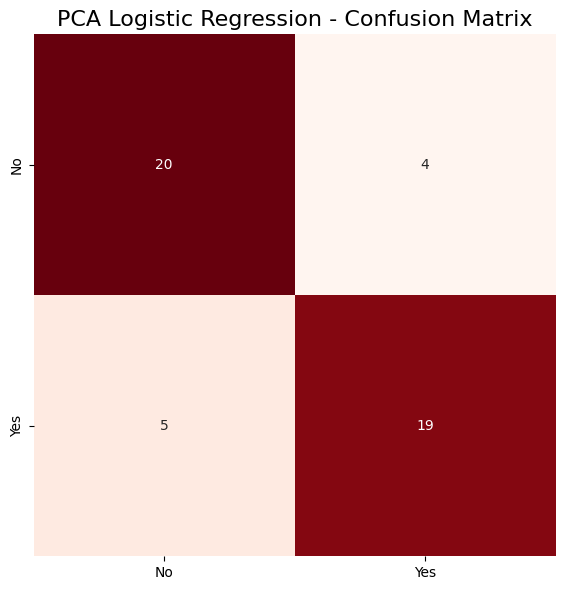

In [20]:
# Visualizzo la Matrice di Confusione tramite Heatmap
visualization.confusion_matrix_heatmap('PCA Logistic Regression', log_reg_conf_matrix)

In [21]:
# Calcolo i coefficienti della Matrice di Confusione
pca_log_reg_precision, pca_log_reg_recall, pca_log_reg_f1, pca_log_reg_tn, pca_log_reg_fp, pca_log_reg_fn, pca_log_reg_tp, pca_log_reg_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, log_reg_y_pred, log_reg_conf_matrix)

Precisione: 0.8260869565217391
Recall: 0.7916666666666666
F1-score: 0.8085106382978723
Specificità: 0.8333333333333334


In [22]:
# Creo il dataframe funzionale alla visualizzazione grafica
pca_log_reg_conf_matrix_coefficients_df = classification_model.conf_matrix_coefficients_to_df(
    pca_log_reg_precision,
    pca_log_reg_recall,
    pca_log_reg_f1,
    pca_log_reg_specificity
)

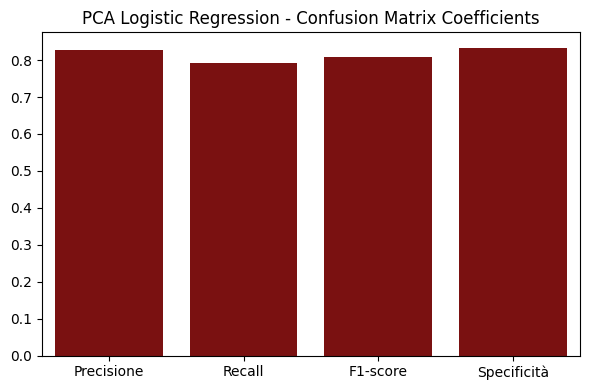

In [23]:
# Visualizzo graficamente le nuove metriche della matrice di confusione
visualization.conf_matrix_coefficients_barplot2('PCA Logistic Regression', pca_log_reg_conf_matrix_coefficients_df)

In [24]:
# Calcolo AUC-ROC e Indice di Gini
pca_log_reg_auc, pca_log_reg_gini = classification_model.model_auc_roc_gini('PCA Logistic Regression', log_reg_y_pred, y_test)

PCA Logistic Regression - AUC-ROC: 0.8125
PCA Logistic Regression - Indice di Gini: 0.625


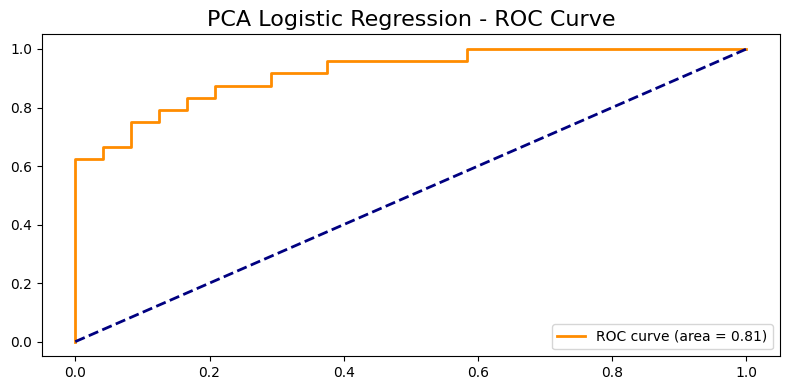

In [25]:
# Visualizzo graficamente la curva ROC
visualization.roc_curve_plot2('PCA Logistic Regression', y_test, log_reg_y_proba, pca_log_reg_auc)

## **K-NEAREST-NEIGHBOURS**

In [26]:
# Isolo i le Features di Train e di Test per KNN
knn_X_train = pca_X_train.copy()
knn_X_test = pca_X_test.copy()

In [27]:
# Inizializzo il modello di KNN
knn = KNeighborsClassifier()

In [28]:
# Eseguiamo il tuning di KNN
knn_cv = classification_model.tune_knn_hyperparameters(knn, knn_X_train, y_train_smote)

Best K: 1
Best Metric: manhattan
Best Accuracy: 0.8861466325660698


In [29]:
# Calcolo l'accuracy del modello sui Dati di Test e salvo le previsioni
knn_y_pred, knn_y_proba, pca_knn_test_accuracy = classification_model.model_accuracy(knn_cv, knn_X_train, knn_X_test, y_train_smote, y_test)

Test Accuracy: 0.7916666666666666


In [30]:
# Calcolo la Matrice di Confusione
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

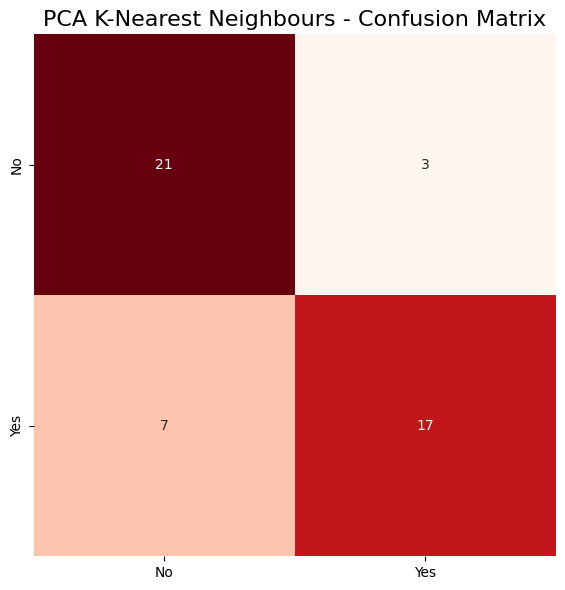

In [31]:
# Visualizzo la Matrice di Confusione tramite Heatmap
visualization.confusion_matrix_heatmap('PCA K-Nearest Neighbours', knn_conf_matrix)

In [32]:
# Calcolo i coefficienti della Matrice di Confusione
pca_knn_precision, pca_knn_recall, pca_knn_f1, pca_knn_tn, pca_knn_fp, pca_knn_fn, pca_knn_tp, pca_knn_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, knn_y_pred, knn_conf_matrix)

Precisione: 0.85
Recall: 0.7083333333333334
F1-score: 0.7727272727272727
Specificità: 0.875


In [33]:
# Creo il dataframe funzionale alla visualizzazione grafica
pca_knn_conf_matrix_coefficients_df = classification_model.conf_matrix_coefficients_to_df(
    pca_knn_precision,
    pca_knn_recall,
    pca_knn_f1,
    pca_knn_specificity
)

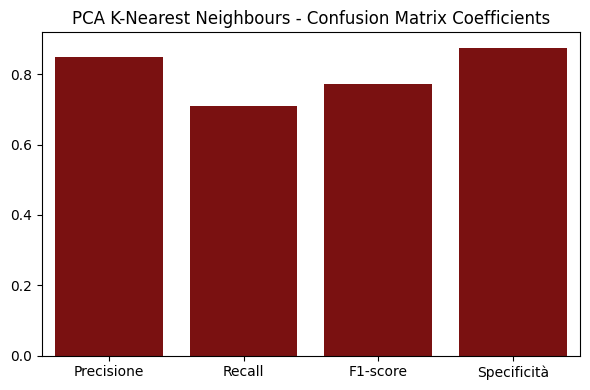

In [34]:
# Visualizzo graficamente le nuove metriche della matrice di confusione
visualization.conf_matrix_coefficients_barplot2('PCA K-Nearest Neighbours', pca_knn_conf_matrix_coefficients_df)

In [35]:
# Calcolo AUC-ROC e Indice di Gini
pca_knn_auc, pca_knn_gini = classification_model.model_auc_roc_gini('PCA KNN', knn_y_pred, y_test)

PCA KNN - AUC-ROC: 0.7916666666666667
PCA KNN - Indice di Gini: 0.5833333333333335


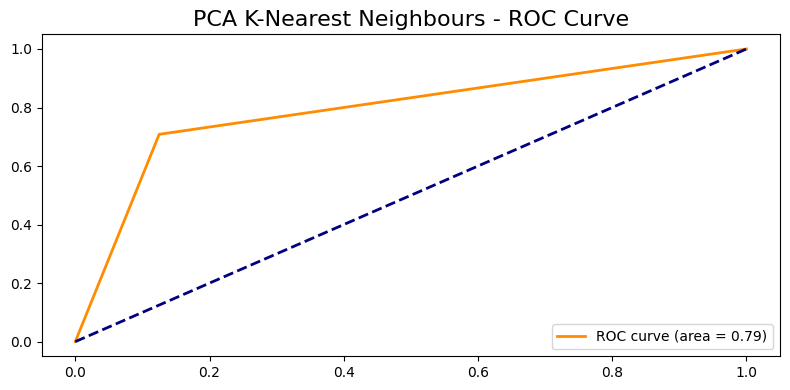

In [36]:
# Visualizzo graficamente la curva ROC
visualization.roc_curve_plot2('PCA K-Nearest Neighbours', y_test, knn_y_proba, pca_knn_auc)

## **DECISION TREE**

In [37]:
# Isolo i le Features di Train e di Test per l'Albero Decisionale
dt_X_train = pca_X_train.copy()
dt_X_test = pca_X_test.copy()

In [38]:
# Inizializzo il modello di Albero Decisionale
decision_tree = DecisionTreeClassifier(random_state=42)

In [39]:
# Eseguo il tuning dell'Albero Decisionale
best_dt_score, best_dt_model = classification_model.tune_decision_tree_pruning(decision_tree, dt_X_train, y_train_smote)

Best cross-validated accuracy: 0.87


In [40]:
# Calcolo l'accuracy del modello sui Dati di Test e salvo le previsioni
dt_y_pred, dt_y_proba, pca_dt_test_accuracy = classification_model.model_accuracy(best_dt_model, dt_X_train, dt_X_test, y_train_smote, y_test)   

Test Accuracy: 0.8125


In [41]:
# Calcolo la Matrice di Confusione
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

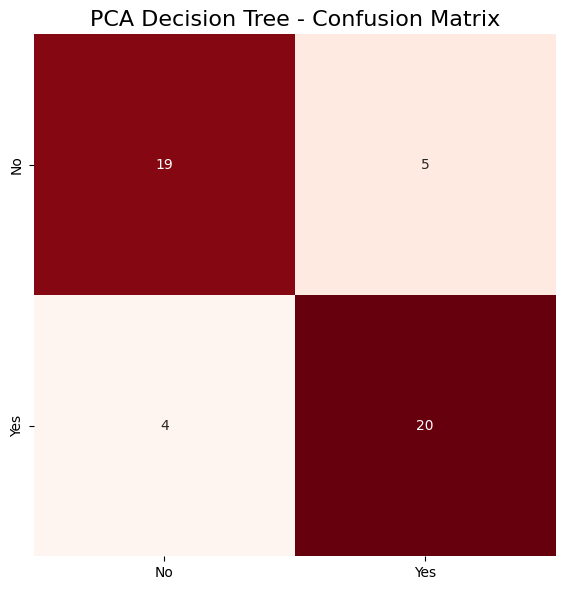

In [42]:
# Visualizzo la Matrice di Confusione tramite Heatmap
visualization.confusion_matrix_heatmap('PCA Decision Tree', dt_conf_matrix)

In [43]:
# Calcolo i coefficienti della Matrice di Confusione
pca_dt_precision, pca_dt_recall, pca_dt_f1, pca_dt_tn, pca_dt_fp, pca_dt_fn, pca_dt_tp, pca_dt_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, dt_y_pred, dt_conf_matrix)

Precisione: 0.8
Recall: 0.8333333333333334
F1-score: 0.8163265306122449
Specificità: 0.7916666666666666


In [44]:
# Creo il dataframe funzionale alla visualizzazione grafica
pca_dt_conf_matrix_coefficients_df = classification_model.conf_matrix_coefficients_to_df(
    pca_dt_precision,
    pca_dt_recall,
    pca_dt_f1,
    pca_dt_specificity
)

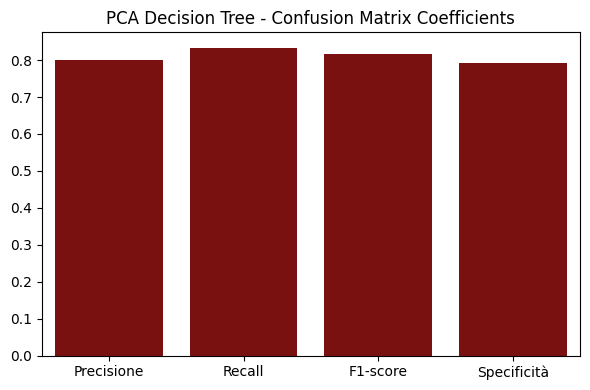

In [45]:
# Visualizzo graficamente le nuove metriche della matrice di confusione
visualization.conf_matrix_coefficients_barplot2('PCA Decision Tree', pca_dt_conf_matrix_coefficients_df)

In [46]:
# Calcolo AUC-ROC e Indice di Gini
pca_dt_auc, pca_dt_gini = classification_model.model_auc_roc_gini('PCA Decision Tree', dt_y_pred, y_test)

PCA Decision Tree - AUC-ROC: 0.8125
PCA Decision Tree - Indice di Gini: 0.625


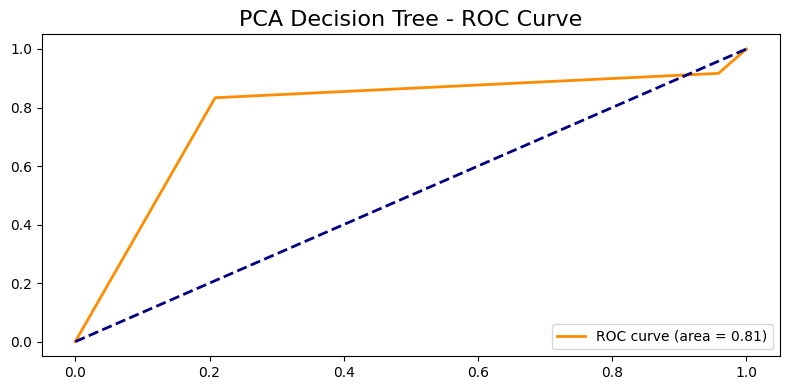

In [47]:
# Visualizzo graficamente la curva ROC
visualization.roc_curve_plot2('PCA Decision Tree', y_test, dt_y_proba, pca_dt_auc)

## **RANDOM FORESTS**

In [48]:
# Isolo i le Features di Train e di Test per la Random Forests
rf_X_train = pca_X_train.copy()
rf_X_test = pca_X_test.copy()

In [49]:
# Inizializzo il modello di Random Forests
random_forests = rfc(random_state = 42)

In [50]:
# Eseguo il tuning della Random Forests
rf_cv = classification_model.tune_rf_hyperparameters(random_forests, rf_X_train, y_train_smote)

Best N. Estimators: 350
Best Max Features: log2
Best Min Samples Leaf: 2
Best Accuracy: 0.8947996589940324


In [51]:
# Calcolo l'accuracy del modello sui Dati di Test e salvo le previsioni
rf_y_pred, rf_y_proba, pca_rf_test_accuracy = classification_model.model_accuracy(rf_cv, rf_X_train, rf_X_test, y_train_smote, y_test)

Test Accuracy: 0.8541666666666666


In [52]:
# Calcolo la Matrice di Confusione
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

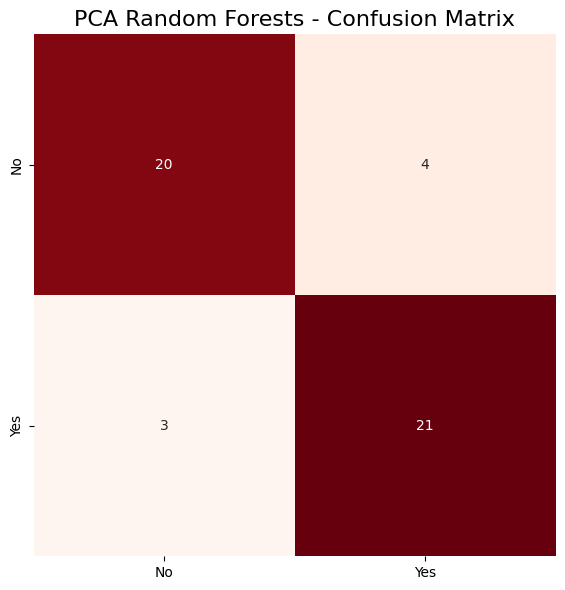

In [53]:
# Visualizzo la Matrice di Confusione tramite Heatmap
visualization.confusion_matrix_heatmap('PCA Random Forests', rf_conf_matrix)

In [54]:
# Calcolo i coefficienti della Matrice di Confusione
pca_rf_precision, pca_rf_recall, pca_rf_f1, pca_rf_tn, pca_rf_fp, pca_rf_fn, pca_rf_tp, pca_rf_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, rf_y_pred, rf_conf_matrix)

Precisione: 0.84
Recall: 0.875
F1-score: 0.8571428571428571
Specificità: 0.8333333333333334


In [55]:
# Creo il dataframe funzionale alla visualizzazione grafica
pca_rf_conf_matrix_coefficients_df = classification_model.conf_matrix_coefficients_to_df(
    pca_rf_precision,
    pca_rf_recall,
    pca_rf_f1,
    pca_rf_specificity
)

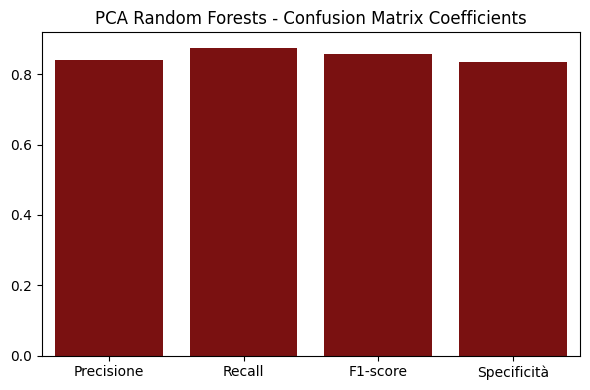

In [56]:
# Visualizzo graficamente le nuove metriche della matrice di confusione
visualization.conf_matrix_coefficients_barplot2('PCA Random Forests', pca_rf_conf_matrix_coefficients_df)

In [57]:
# Calcolo AUC-ROC e Indice di Gini
pca_rf_auc, pca_rf_gini = classification_model.model_auc_roc_gini('Random Forests', rf_y_pred, y_test)

Random Forests - AUC-ROC: 0.8541666666666666
Random Forests - Indice di Gini: 0.7083333333333333


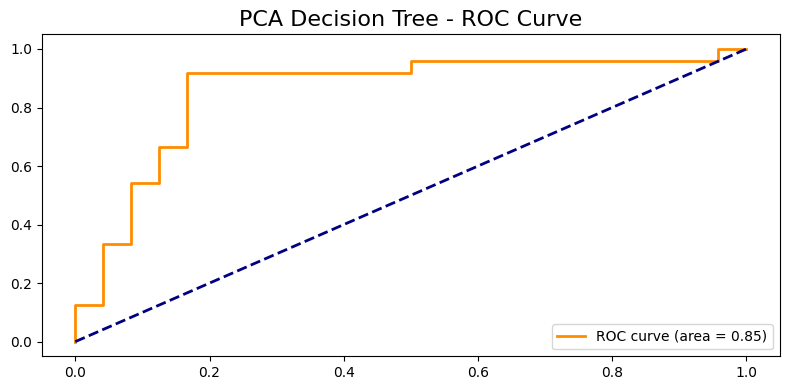

In [58]:
# Visualizzo graficamente la curva ROC
visualization.roc_curve_plot2('PCA Decision Tree', y_test, rf_y_proba, pca_rf_auc)

## **MODEL COMPARISON**

In questa sezione, andremo a confrontare i risultati ottenuti dai vari modelli, al fine di stabilire qual è il **migliore** per l'obiettivo dell'analisi, ovvero **prevedere le compagnie in bancarotta**.

Con **model_metrics_df**, andiamo a creare un dataframe che riporta, per ciascun modello (**Regressione Logistica**, **K-Neares Neighbours**, **Decision Tree** e **Random Forests**), le seguenti metriche in ordine di importanza:
1. **Recall**: sulle compagnie che sono **effettivamente in bancarotta**, misura quanto il modello ne indovina correttamente
2. **F1-score**: misura il **bilanciamento tra Precisione e Recall**
3. **Precisione**: sulle compagnie **classificate dal modello come in bancarotta**, misura quante sono effettivamente quelle corrette
4. **AUC-ROC**: misura la capacità del modello di **distinguere tra compagnie in bancarotta e non**
5. **Indice di Gini**: legato all'**AUC-ROC**, misura anch'esso la capacità del modello di **distinguere tra compagnie in bancarotta e non**
6. **Test Accuracy**: misura quanto il modello classifica correttamente le compagnie (in bancarotta e non), quindi fornisce **un'idea generale delle performance del modello**

In [59]:
# Inizializzo il dataframe che contiene le metriche dei vari modelli
pca_model_comparison_df = classification_model.model_metrics_df(
    ['Logistic Regression', 'K-Nearest Neighbours', 'Decision Tree', 'Random Forests'],
    [pca_log_reg_test_accuracy, pca_knn_test_accuracy, pca_dt_test_accuracy, pca_rf_test_accuracy],
    [pca_log_reg_recall, pca_knn_recall, pca_dt_recall, pca_rf_recall],
    [pca_log_reg_f1, pca_knn_f1, pca_dt_f1, pca_rf_f1],
    [pca_log_reg_precision, pca_knn_precision, pca_dt_precision, pca_rf_precision],
    [pca_log_reg_auc, pca_knn_auc, pca_dt_auc, pca_rf_auc],
    [pca_log_reg_gini, pca_knn_gini, pca_dt_gini, pca_rf_gini]
)

Sulla base del risultato:
- **Random Forests**: risulta il **modello migliore** perché prevale in **Recall** e **F1-score**, ma anche nelle altre metriche, ad eccezione della Precisione
- **Albero Decisionale**: risulta l'**alternativa migliore** alla Random Forests
- **Regressione Logistica**: ha dei buoni risultati, ma non è la scelta primaria
- **K-Nearest Neighbours**: nonostante prevalga nella Precisione, è il **modello peggiore**, poiché arriva ultimo in tutte altre metriche

<Figure size 1200x800 with 0 Axes>

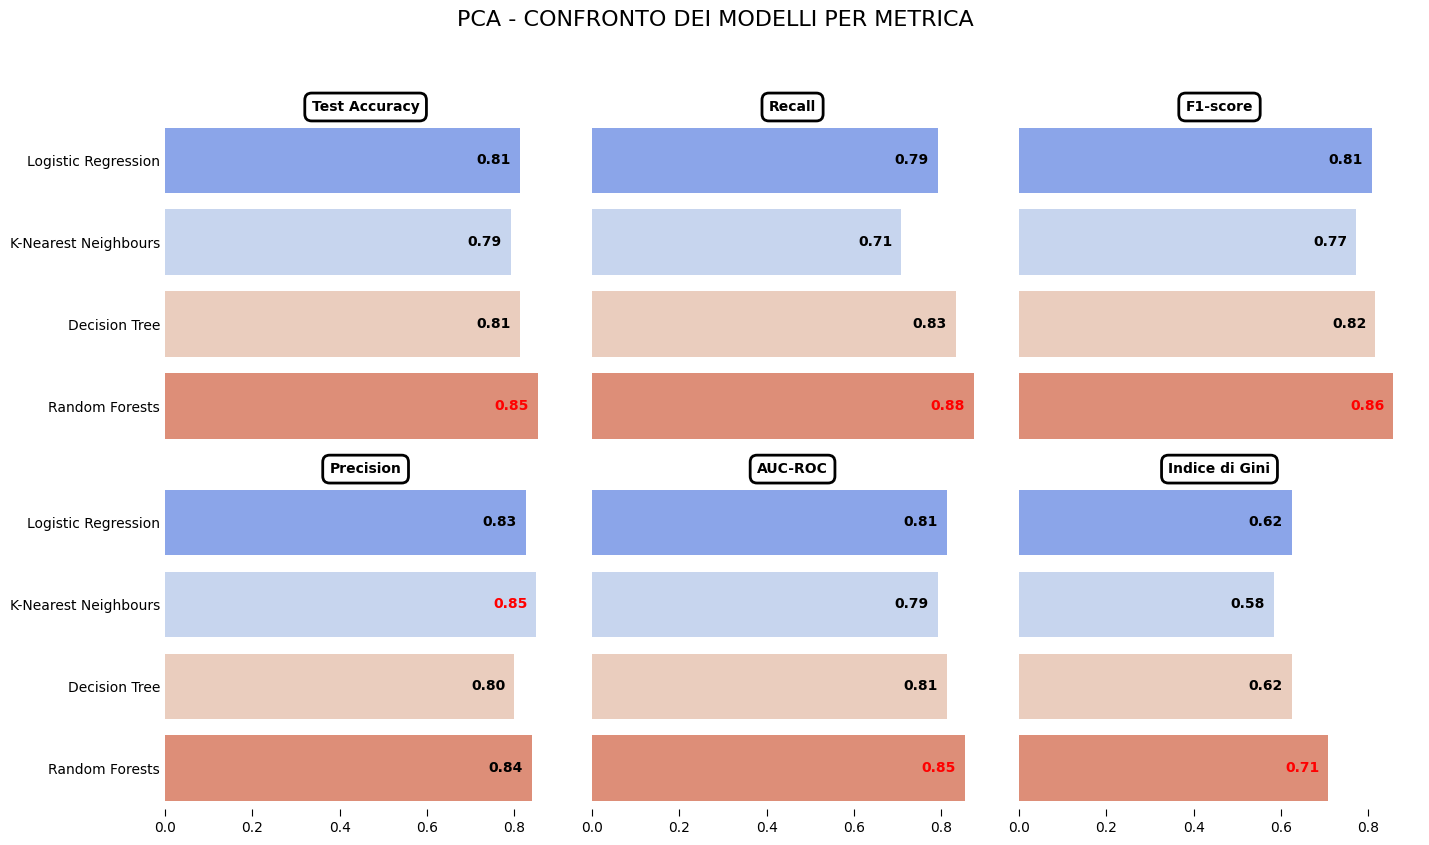

In [60]:
visualization.model_comparison_barplot(pca_model_comparison_df, True)